## Ques2 part 3


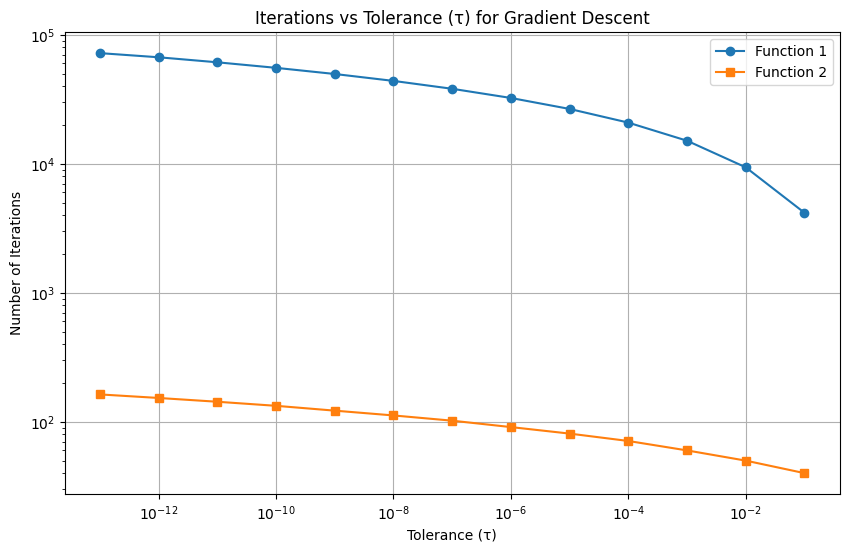

Results for Function 1:
    Tolerance (τ)                           Final Minimizer  Objective Value  \
0    1.000000e-01   [0.897294082717022, 0.8046997000389498]     1.056760e-02   
1    1.000000e-02  [0.9889219875478029, 0.9779220714056361]     1.229215e-04   
2    1.000000e-03  [0.9988834002152379, 0.9977635760398114]     1.248794e-06   
3    1.000000e-04  [0.9998882281174223, 0.9997760214315735]     1.251296e-08   
4    1.000000e-05  [0.9999888222623092, 0.9999775999204458]     1.251408e-10   
5    1.000000e-06  [0.9999988820095993, 0.9999977595466973]     1.278311e-12   
6    1.000000e-07  [0.9999998882223318, 0.9999997759973865]    -1.598721e-14   
7    1.000000e-08  [0.9999999888198884, 0.9999999775950386]     2.853273e-14   
8    1.000000e-09  [0.9999999988822007, 0.9999999977599283]     0.000000e+00   
9    1.000000e-10  [0.9999999998882415, 0.9999999997760358]     0.000000e+00   
10   1.000000e-11   [0.9999999999888219, 0.999999999977599]     0.000000e+00   
11   1.000000e-1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f1(x):
    x1, x2 = x
    return 100 * x2**2 + 100 * x1**4 - 200 * x2 * x1**2 + x1**2 - 2 * x1 + 1

def grad_f1(x):
    x1, x2 = x
    df_dx1 = 400 * x1**3 - 400 * x1 * x2 + 2 * x1 - 2
    df_dx2 = 200 * x2 - 200 * x1**2
    return np.array([df_dx1, df_dx2])

def f2(x):
    x1, x2 = x
    return x1**4 + x2**4 - 20 * x1**3 - 20 * x2**3 + 100 * x1**2 + 100 * x2**2

def grad_f2(x):
    x1, x2 = x
    df_dx1 = 4 * x1**3 - 60 * x1**2 + 200 * x1
    df_dx2 = 4 * x2**3 - 60 * x2**2 + 200 * x2
    return np.array([df_dx1, df_dx2])

def gradient_descent(f, grad_f, x0, eta, tau):
    x = np.array(x0, dtype=float)
    k = 0
    while np.linalg.norm(grad_f(x), 2) > tau:
        x = x - eta * grad_f(x)
        k += 1
    return x, f(x), k


x0 = [-1.5, 1.5]
eta = 0.001
p_values = range(1, 14)
tolerances = [10**-p for p in p_values]

results_f1 = []
results_f2 = []

for tau in tolerances:
    minimizer_f1, f_value_f1, iterations_f1 = gradient_descent(f1, grad_f1, x0, eta, tau)
    results_f1.append((tau, minimizer_f1, f_value_f1, iterations_f1))
    
    minimizer_f2, f_value_f2, iterations_f2 = gradient_descent(f2, grad_f2, x0, eta, tau)
    results_f2.append((tau, minimizer_f2, f_value_f2, iterations_f2))

taus_f1 = [r[0] for r in results_f1]
iterations_f1 = [r[3] for r in results_f1]
taus_f2 = [r[0] for r in results_f2]
iterations_f2 = [r[3] for r in results_f2]


plt.figure(figsize=(10, 6))
plt.plot(taus_f1, iterations_f1, marker='o', label="Function 1")
plt.plot(taus_f2, iterations_f2, marker='s', label="Function 2")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Tolerance (τ)")
plt.ylabel("Number of Iterations")
plt.title("Iterations vs Tolerance (τ) for Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


columns = ["Tolerance (τ)", "Final Minimizer", "Objective Value", "Iterations"]
df_f1 = pd.DataFrame(results_f1, columns=columns)
df_f2 = pd.DataFrame(results_f2, columns=columns)


print("Results for Function 1:")
print(df_f1)
print("\nResults for Function 2:")
print(df_f2)


### Ques 2 part 4

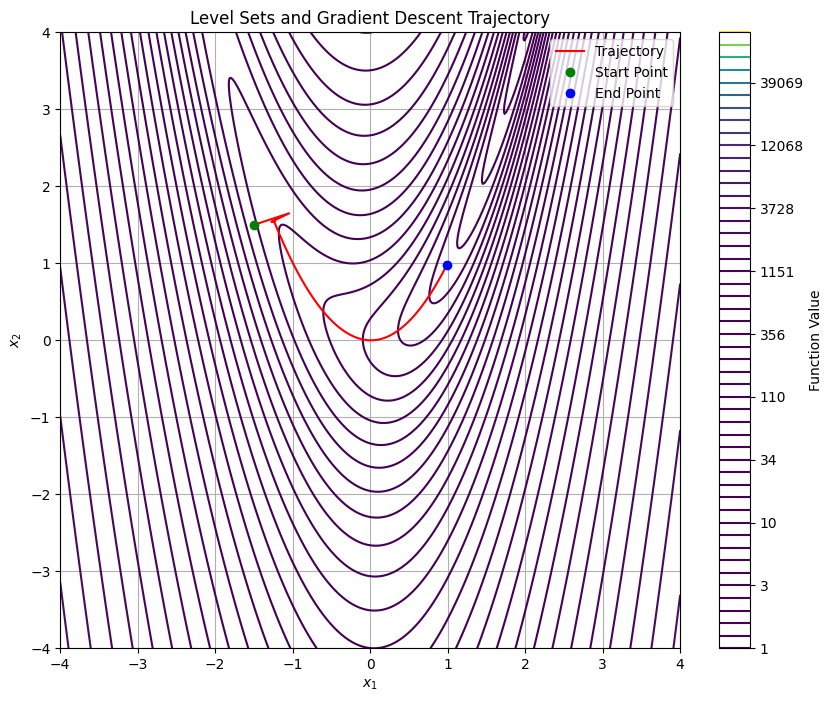

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2):
    return (4-x1)**2 + 10*(x2 - x1**2)**2
    #return 100 * x2**2 + 100 * x1**4 - 200 * x2 * x1**2 + x1**2 - 2 * x1 + 1

def grad_f(x1, x2):
    df_dx1 = 400 * x1**3 - 400 * x1 * x2 + 2 * x1 - 2
    df_dx2 = 200 * x2 - 200 * x1**2
    return np.array([df_dx1, df_dx2])

def gradient_descent(f_grad, x0, eta, tau, max_iter=10000):
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    for _ in range(max_iter):
        grad = f_grad(*x)
        if np.linalg.norm(grad) < tau:
            break
        x -= eta * grad
        trajectory.append(x.copy())
    return x, np.array(trajectory)


x0 = [-1.5, 1.5]  
eta = 0.001       
tau = 1e-6        
x1_vals = np.linspace(-4, 4, 400)
x2_vals = np.linspace(-4, 4, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
F = f(X1, X2)


minimizer, trajectory = gradient_descent(grad_f, x0, eta, tau)

plt.figure(figsize=(10, 8))

plt.contour(X1, X2, F, levels=np.logspace(0, 5, 50), cmap='viridis')

trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-', label="Trajectory")
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', label="Start Point")
plt.plot(trajectory[-1, 0], trajectory[-1, 1], 'bo', label="End Point")

plt.title("Level Sets and Gradient Descent Trajectory")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.colorbar(label="Function Value")
plt.grid()
plt.show()
